# Unstructured Grid Overview

---

The goal of this notebook is to provide a brief overview of unstructured grids and provide a teaser of plotting with the UXarray package.
Contents:
1. Structured vs. Unstructured Grids
2. Structured Grids
3. Unstructured Grids
4. Why UXarrary for unstructured grids?
5. Loading and plotting a mesh with UXarray

## Structured vs Unstructured Grids


It is important to understand this difference, before diving into unstructured grid:

A structured grid is well-ordered, with a simple scheme used to label elements and identify neighbors, while an unstructured grid allows elements to be joined in any manner, requiring special lists to identify neighboring elements.

Note that the focus here is on two dimensional grids in the climate and weather context, but the same concepts apply to three dimensional grids.

# Structured Grid
A few advantages of structured grids are:
- Uniform Representation: Simplifies numerical methods and enhances result interpretation.
  
- Efficient Numerics: Well-suited for finite-difference schemes, ensuring computational efficiency.
  
- Simplified Interpolation: Straightforward interpolation facilitates integration of observational data and model outputs.
  
- Boundary Handling: Ideal for regular boundaries, easing implementation of boundary conditions.
  
- Optimized Parallel Computing: Regular structure supports efficient parallel computing for scalability.

This code below shows a structured mesh example over 2D earth geometry and plots random temperature data. 

Given the number of points in longitude and latitude direction, the code uses Numpy's meshgrid to generates a structured grid. The temperature data is then interpolated onto this grid, creating a smooth representation. Xarray is leveraged to organize the gridded data into a dataset, facilitating easy manipulation and visualization. The resulting plot showcases the data on this structure mesh, providing a clearer understanding of temperature variations across defined longitude and latitude ranges. Plotting the structured grid and the temperature data is done using Cartopy, a cartographic plotting library. 

There are many other libraries and ways to create a structured grids.

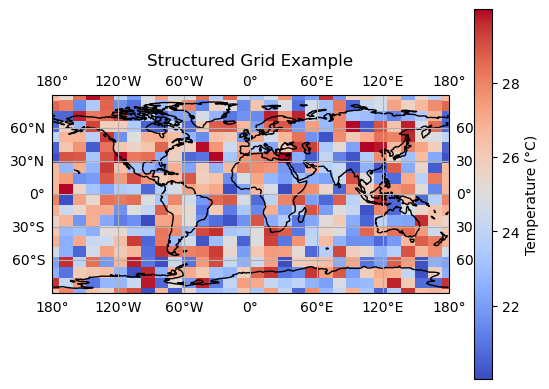

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

# Define the global domain
lat_range = [-90.0, 90.0]
lon_range = [-180.0, 180.0]

# Create a structured grid. Note the number of points in each dimension
# There is not need to store the grid points in a separate array
# Also note that the grid points are evenly spaced and not connectivity information is needed

num_lat_points = 20
num_lon_points = 30

lats = np.linspace(lat_range[0], lat_range[1], num_lat_points)
lons = np.linspace(lon_range[0], lon_range[1], num_lon_points)

lons_grid, lats_grid = np.meshgrid(lons, lats)

# Generate random temperature data for each grid point
temperature_data = np.random.uniform(low=20, high=30, size=(num_lat_points, num_lon_points))

# Create xarray Dataset
ds = xr.Dataset()
ds['temperature'] = (['lat', 'lon'], temperature_data)
ds['lon'] = lons
ds['lat'] = lats

# Plot the structured grid using xarray
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# Plot world map lines
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Plot the structured grid
cs = ax.pcolormesh(ds['lon'], ds['lat'], ds['temperature'], cmap='coolwarm', shading='auto')

# Colorbar
cbar = plt.colorbar(cs, ax=ax, label='Temperature (°C)')

ax.set_title('Structured Grid Example')
plt.show()

# Unstructured Grids


- Adaptability to complex geometries: Fits intricate shapes and boundaries

- Often runs faster than structured grids: Requires fewer elements to achieve similar accuracy
  
- Local refinement: Concentrates resolution on areas of interest
  
- Flexibility in element types: Accommodates various element shapes
  
- Efficient parallelization: Scales well to multiple processors
  
- Suitability for dynamic simulations: Adapts to changing conditions

There are a variety of libraries and conventions for creating unstructured grids. Here we use a very basic standard python approach to showcase an unstructured grid: 

The code generates an unstructured grid over a rectangular domain defined by latitude and longitude ranges. It creates a set of points using matplotlib.tri.Triangulation. The resulting triangulation is then plotted using cartopy and matplotlib.

The are many other types of elements that can be used to create unstructured grids. Polygonal elements are often used to represent complex geometries. Meshes often contain mixed elements with different types of elements used in different areas of the domain.

Number of Points: 1000
Number of Triangles: 1976
First Point Latitude: -88.0492227335463
First Point Longitude: 110.04125506201916
Connectivity of the First Triangle: [407 171 356]


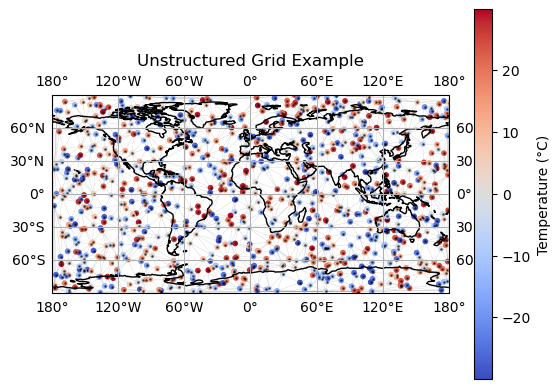

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.tri as mtri
import xarray as xr

# Generate random temperature data
np.random.seed(42)
num_points = 1000
latitudes = np.random.uniform(low=-90, high=90, size=num_points)
longitudes = np.random.uniform(low=-180, high=180, size=num_points)
temperatures = np.random.uniform(low=-30, high=30, size=num_points)

# Create xarray DataArray for temperature data
temperature_data = xr.DataArray(temperatures, dims='points', coords={'points': range(num_points)})

# Perform Delaunay triangulation
triang = mtri.Triangulation(longitudes, latitudes)


# NOTE: that unstructured grid needs to have connectivity information
print("BASICS OF UNSTRUCTURED GRID:")
print("Number of Nodes:", triang.x.shape[0])
print("Number of Elements (Triangles):", triang.triangles.shape[0])
print("First Point Latitude:", latitudes[triang.triangles[0][0]])
print("First Point Longitude:", longitudes[triang.triangles[0][0]])
print("Connectivity of the First Triangle:", triang.triangles[0])

# Create xarray DataArray for triangulation coordinates
triang_data = xr.DataArray(np.column_stack([triang.x, triang.y]), dims=('points', 'coords'))

# Plot the globe with unstructured mesh using xarray
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# Plot world map lines
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Plot unstructured mesh
ax.triplot(triang, 'ko-', markersize=1, linewidth=0.1, alpha=0.5)

# Scatter plot with temperature data
sc = ax.scatter(longitudes, latitudes, c=temperature_data, cmap='coolwarm', s=10, transform=ccrs.PlateCarree())

# Colorbar
cbar = plt.colorbar(sc, ax=ax, label='Temperature (°C)')

ax.set_title('Unstructured Grid Example')
plt.show()

NOTE: This is a very basic example of an unstructured grid with triangles. There are very specialized libraries to create unstructured grids. Often the region of interest is meshed with a finer resolution. The mesh is then coarsened in areas where the resolution is not needed. This is done to reduce the number of elements and improve computational efficiency.

# Why UXarray for unstructured grids?

- It inherits from Xarray, providing simplified data using familiar (Xarray like) data structures and operations.
  
- Bring standardization to unstructured mesh support for climate data analysis and visualization.

- Adherence to the UGrid specification for compatibility across a variety of mesh formats.

- Optimized data structures and algorithms for handling large and complex unstructured datasets. 

- Enhanced Interoperability and Community Collaboration.

- One interface for a variety of unstructured grid formats.

There are unstructured grid format such as Exodus, SCRIP, MPAS, UGRID etc. UXarray is a library that can read and write many such unstructured grid formats. The specific focus of UXarray is to provide a common interface to access and operate on unstructured grids in the climate science community.

## Loading and plotting NetCDF mesh and data with UXarray

The code below loads an MPAS OCEAN mesh and plots it using the UXarray library plot function.

MPAS or the Model for Prediction Across Scales provides a versatile and scalable framework for Earth system modeling, and the MPAS ocean mesh is a critical component for simulating ocean dynamics with adaptability to varying scales and regions. It is widely used in climate science research for a range of applications, from global climate simulations to regional oceanographic studies.

In [145]:
import uxarray as ux
import requests

small_file_480km = requests.get(
            "https://web.lcrc.anl.gov/public/e3sm/inputdata/share/meshes/mpas/ocean/oQU480.230422.nc"
        ).content

ds_small_480km = ux.open_dataset(small_file_480km, small_file_480km)
print("The mesh contains:", ds_small_480km.uxgrid)

The mesh contains: <uxarray.Grid>
Original Grid Type: MPAS
Grid Dimensions:
  * n_node: 3947
  * n_face: 1791
  * n_edge: 5754
  * n_max_face_nodes: 6
  * n_max_faces_per_node: 3
  * two: 2
  * n_nodes_per_face: (1791,)
Grid Coordinates (Spherical):
  * node_lon: (3947,)
  * node_lat: (3947,)
  * edge_lon: (5754,)
  * edge_lat: (5754,)
  * face_lon: (1791,)
  * face_lat: (1791,)
Grid Coordinates (Cartesian):
  * node_x: (3947,)
  * node_y: (3947,)
  * node_z: (3947,)
  * edge_x: (5754,)
  * edge_y: (5754,)
  * edge_z: (5754,)
  * face_x: (1791,)
  * face_y: (1791,)
  * face_z: (1791,)
Grid Connectivity Variables:
  * face_node_connectivity: (1791, 6)
  * edge_node_connectivity: (5754, 2)
  * face_edge_connectivity: (1791, 6)
  * edge_face_connectivity: (5754, 2)
  * node_face_connectivity: (3947, 3)



# Plot data on a mesh with UXarray

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
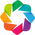

:Path   [x,y]

In [146]:
ds_small_480km.uxgrid.plot(title="MPAS OCEAN Unstructured Mesh Plot", height=350, width=700)

Now check the variables in the mesh dataset and plot one of the variables:

In [147]:
ds_small_480km

<xarray.UxDataset>
Dimensions:                   (n_edge: 5754, maxEdges2: 12, TWO: 2,
                               n_node: 3947, vertexDegree: 3, n_face: 1791,
                               nVertLevels: 60, n_max_face_nodes: 6, Time: 1)
Dimensions without coordinates: n_edge, maxEdges2, TWO, n_node, vertexDegree,
                                n_face, nVertLevels, n_max_face_nodes, Time
Data variables: (12/49)
    edgesOnEdge               (n_edge, maxEdges2) int32 3 13 21 ... 3174 3174
    weightsOnEdge             (n_edge, maxEdges2) float64 0.2075 0.0793 ... 0.0
    cellsOnEdge               (n_edge, TWO) int32 377 0 800 0 ... 2 452 2 451
    verticesOnEdge            (n_edge, TWO) int32 2482 2483 3358 2482 ... 7 10 6
    angleEdge                 (n_edge) float64 -2.24 -1.258 ... -1.571 -1.571
    dcEdge                    (n_edge) float64 4.619e+05 4.487e+05 ... 4.123e+05
    ...                        ...
    refTopDepth               (nVertLevels) float64 0.0 10.0 ... 5e+03 5.25e+03
    refZMid                   (nVertLevels) float64 -5.0 -15.0 ... -5.375e+03
    refLayerThickness         (nVertLevels) float64 10.0 10.0 ... 250.0 250.0
    layerThickness            (Time, n_face, nVertLevels) float64 10.0 ... 0.0
    ssh                       (Time, n_face) float64 9.095e-13 ... 9.095e-13
    zMid                      (Time, n_face, nVertLevels) float64 -5.0 ... nan

/opt/homebrew/anaconda3/envs/uxarray_build/lib/python3.11/site-packages/uxarray/plot/dataarray_plot.py:480: UserWarning: Including Antimeridian Polygons may lead to visual artifacts. It is suggested to keep 'exclude_antimeridian' set to True.
  warnings.warn(


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
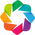

:Polygons   [x,y]   (bottomDepth)

In [148]:
ds_small_480km['bottomDepth'].plot.polygons(title="Bottom Depth Polygon Plot", height=350, width=700)

This notebook serves as an introduction to unstructured grids and UXarray. For more information, please visit the UXarray documentation at https://uxarray.readthedocs.io/en/latest/ and specifically see the example section: https://uxarray.readthedocs.io/en/latest/examples.html